In [5]:
from linkedin_api import Linkedin
import pandas as pd
import re
from langdetect import detect

In [6]:
## Enter the email address and password with which you login to LinkedIn in the following links##

EMAIL = ""
PASS = ""

In [7]:
api = Linkedin(EMAIL, PASS, cookies_dir=None, cookies=None,refresh_cookies=True)

In [9]:
KEYWORD = 'Data Scientist'
LOCATION = 'Germany'
POST_TIME = 86400 * 1 ## This is the number of seconds in the past 1 day(s). Change 1 to any number of previous days
## you want the search to include.

raw_list_of_jobs = api.search_jobs(keywords= KEYWORD, 
                                   location_name= LOCATION,
                                   listed_at= POST_TIME,
                                   companies=None,
                                   experience=None,
                                   job_type=None,
                                   job_title=None,
                                   industries=None,
                                   remote=False,
                                   distance=None)

## Exclude Certain Keywords

Run this cell if you want certain keywords to be excluded from the job search. For this search, I was not looking for a 'Senior' job position as a 'Data scientist'. That's why I excluded the possible words indicating a senior position. Change it to your specifications if needed, or skip it if you do not need more specification.

In [10]:

stopwords = ['Senior', 'Sr.', 'Sr']

output = raw_list_of_jobs.copy()
temp = []
  
for elem in raw_list_of_jobs:
    for stopword in stopwords:
        if stopword in elem['title']:
            temp.append(elem)
for elem in temp:
    if elem in output:
        output.remove(elem)
        


## Processing data

In the following cell, you can extract the important information about the jobs you have initially found. Here you extract and collect the following information about each job:

* The company posting it
* The exact job title
* The job description

You can add to this list, by looking at one instance of the `apijob` which has a lot of details about the posted job you can extract.

Keep in mind that there are some jobs with missing information and to not stop the listing, the following code skips those with missing information using `try/except`.


In [ ]:
processed_list_of_jobs = []

count = 0

for job in output:
    count+=1
    job_details = {}
    job_id = re.findall(r'[0-9]+',job['dashEntityUrn'])
    job_details['id'] = job_id[0]
    apijob = api.get_job(job_id[0])
    try:
        job_details['company'] = apijob['companyDetails']['com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany']['companyResolutionResult']['name']
        job_details['title'] = job['title']
        job_details['description'] = apijob['description']['text']
        processed_list_of_jobs.append(job_details)
        print(f'Items added to the list: {count}')
    except KeyError:
        print(f"A KeyError Happened at item {count}")

The following cell saves the cleaned, processed job details in a CSV format. You can skip this step if you don't need the information to be saved.

In [12]:
df = pd.DataFrame(processed_list_of_jobs)
df.to_csv('linkedin-datascience-jobs.csv',header=True, index=False, mode='a')

In the following cell, replace the skills set with the skills you know are important in your field, to then use them to search in the job descriptions for the most and least required skills for the job you are looking for.

In the next two cells, you will find the number of job descriptions that mentioned each of these skills and plot the list of skills from least to most demanded.

In [13]:
skills = {'Python', 'SQL', 'Machine learning', ' R ','Github', 'Data analysis', 'Data visualization', 'Statistics',
          'Deep learning', 'Big data', 'Hadoop', 'Apache Spark', 'Natural language processing', 'TensorFlow', 'Keras',
          'Scikit-learn', 'Tableau', 'Matplotlib', 'Pandas', 'NumPy', 'Data mining', 'Data warehousing',
          'Business Intelligence', 'Artificial intelligence', 'Computer vision', 'AWS', 'Azure', 'Pytorch', 'Data Engineering', 
          'Pytorch','Google Cloud Platform', 'Git', 'Linux', 'Predictive modelling', 'Regression analysis', 'Causal Inference',
          'Cluster analysis', 'Time series', 'NoSQL', 'Jenkins', 'Cassandra', 'Oracle', 'MySQL', 'PostgreSQL',
          'ETL', 'Data cleaning', 'Data preprocessing', 'Feature engineering', 'Signal processing', 'Image processing',
          'Signal analysis', 'Parallel computing', 'Distributed computing', 'Agile'}


In [14]:
count_skills = {skill: 0 for skill in skills}
for item in processed_list_of_jobs:
    for skill in skills:
        if skill.lower() in item['description'].lower():
            count_skills[skill] += 1

print(count_skills)

{'Computer vision': 8, 'Big data': 12, 'Google Cloud Platform': 1, 'Causal Inference': 0, 'Matplotlib': 1, 'Cassandra': 1, 'Distributed computing': 1, 'Machine learning': 20, 'Apache Spark': 0, 'Predictive modelling': 0, 'Feature engineering': 0, 'Hadoop': 6, 'Cluster analysis': 0, 'Time series': 0, 'Data Engineering': 10, 'Business Intelligence': 8, 'Github': 9, 'Data preprocessing': 0, 'Azure': 41, 'Data analysis': 5, ' R ': 5, 'Statistics': 9, 'Regression analysis': 0, 'Linux': 66, 'MySQL': 5, 'Pandas': 2, 'SQL': 93, 'Image processing': 2, 'AWS': 43, 'Artificial intelligence': 7, 'NoSQL': 9, 'Deep learning': 2, 'Natural language processing': 0, 'Tableau': 4, 'Signal processing': 3, 'Parallel computing': 0, 'Data cleaning': 0, 'Pytorch': 4, 'Git': 328, 'ETL': 12, 'Agile': 221, 'Jenkins': 23, 'Python': 98, 'Oracle': 21, 'Data visualization': 3, 'PostgreSQL': 15, 'Keras': 0, 'Data warehousing': 1, 'Data mining': 0, 'Scikit-learn': 2, 'TensorFlow': 7, 'Signal analysis': 0, 'NumPy': 0}


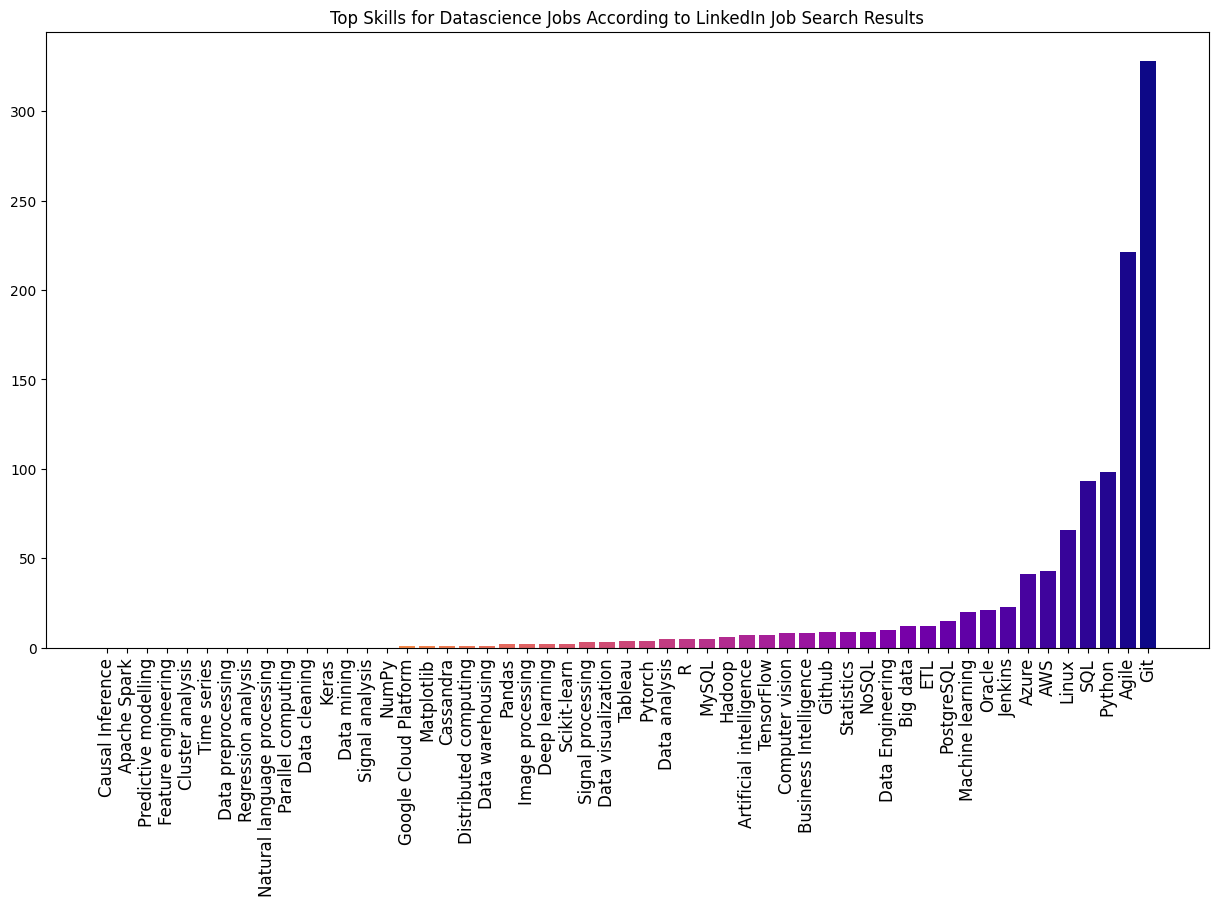

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
color = cm.plasma(np.linspace(1, 0, 53))

plt.figure(figsize=(15,8))
sorted_count_skills = {k: v for k, v in sorted(count_skills.items(), key=lambda item: item[1])}
plt.bar(sorted_count_skills.keys(),sorted_count_skills.values(), color=color)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top Skills for Datascience Jobs According to LinkedIn Job Search Results");
plt.savefig('job-search-linkedin.png')


# Add Job posting language (Optional)

Here I added the language of the job posting to each job entry, because I am looking for jobs in Germany and I wanted to filter the job postings in German. However, it may not be required for where you are looking for jobs. So feel free to not run the following cell.

In [17]:
for index, item in enumerate(df['description']):
    df.loc[index,['language']] = detect(item)
df.head()

,id,company,title,description,language
0,3502125143,CGI,IT Business Analyst / Prozessmanager (m/w/d),"Stellenbeschreibung\nDu hast Interesse daran, ...",de
1,3531669265,Optimus Search,Python Developer,Python Developer - Frankfurt - Up to 85k - Lea...,en
2,3488177038,scoopIT GmbH,Consultant Data Science (m/w/d),Ihre Mission: Digitalen Wandel begleiten \nGem...,de
3,3408766781,AUDI AG,Entwicklungsingenieur_in Insassenschutz / Mens...,Job Purpose/Role \n\n\n Sie entwickeln mit Hil...,de
4,3535796015,Soilwatch,Geospatial Data Scientist,What we're looking for\nThe state of our geosp...,en
